In [1]:
pip install numpy pandas matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

file_path = '5_yrs_grid_data2.csv'
df=pd.read_csv(file_path)

# numerical_columns = df.select_dtypes(include=['number']).columns
# df['n1c'] = df['n1c'].replace(0,df['n1c'].mean())
# df['n2c'] = df['n2c'].replace(0,df['n1c'].mean())
# df['n3c'] = df['n3c'].replace(0,df['n1c'].mean())

X = df[['c1','c2','c3','p1','p2','p3','n1c','n2c','n3c']]
y = df[['stability']] 

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=42)


#model = LogisticRegression()
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)


y_pred = model.predict(X)


accuracy = accuracy_score(y, y_pred)
conf_matrix = confusion_matrix(y, y_pred)
class_report = classification_report(y, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


C:\Users\narve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 1.0
Confusion Matrix:
[[27936     0]
 [    0 15887]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27936
           1       1.00      1.00      1.00     15887

    accuracy                           1.00     43823
   macro avg       1.00      1.00      1.00     43823
weighted avg       1.00      1.00      1.00     43823



In [18]:
new_data = {'c1':-1.94,'c2':-0.79,'c3':-1.17,'p1':0.20,'p2':0.12,'p3':0.05,'n1c':10.63,'n2c':23.93,'n3c':18.61}

# Convert the new data to a DataFrame
new_df = pd.DataFrame([new_data])

# Predict the classification using the trained model
predicted_class = model.predict(new_df)

print(f'Predicted Class: {predicted_class}')


Predicted Class: [1]


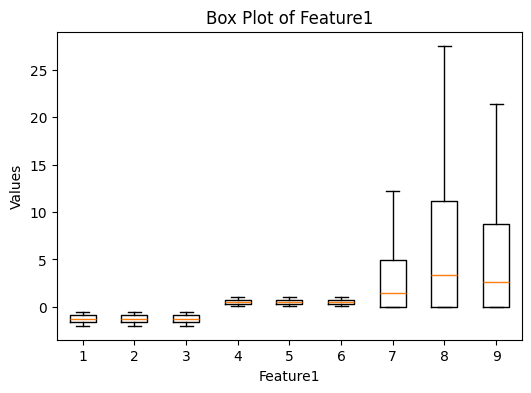

In [92]:
plt.figure(figsize=(6, 4))
plt.boxplot(df[['c1','c2','c3','p1','p2','p3','n1c','n2c','n3c']])
plt.xlabel('Feature1')
plt.ylabel('Values')
plt.title('Box Plot of Feature1')
plt.show()


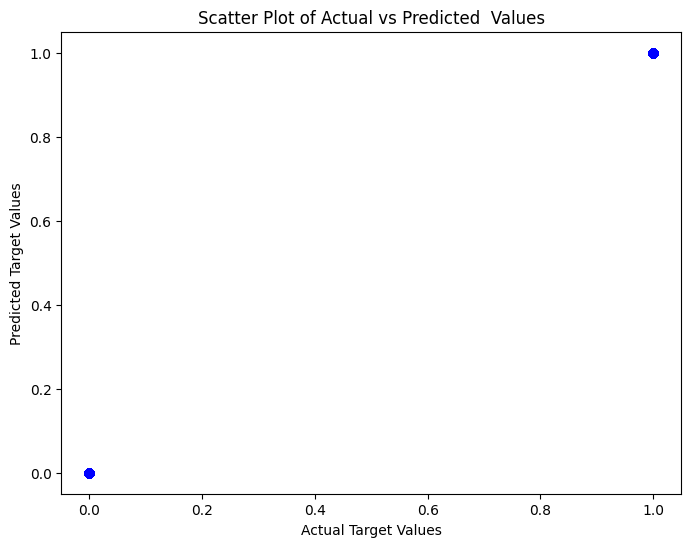

In [98]:
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', alpha=0.2)  # Actual vs Predicted
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Scatter Plot of Actual vs Predicted  Values')
plt.show()

In [102]:
df1=pd.read_csv('test_3month_stable.csv')
X1 = df1[['c1','c2','c3','p1','p2','p3','n1c','n2c','n3c']]
y=df1[['stability']]

y1_pred = model.predict(X1)


accuracy = accuracy_score(y, y1_pred)
conf_matrix = confusion_matrix(y, y1_pred)
class_report = classification_report(y, y1_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.7106227106227107
Confusion Matrix:
[[1222  199]
 [ 433  330]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.86      0.79      1421
           1       0.62      0.43      0.51       763

    accuracy                           0.71      2184
   macro avg       0.68      0.65      0.65      2184
weighted avg       0.70      0.71      0.70      2184



In [190]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

df = pd.read_csv('5_yrs_grid_data2.csv')
selected_columns = ['c1','c2','c3','p1','p2','p3','n1c','n2c','n3c'] 
selected_data = df[selected_columns]

scaler = MinMaxScaler()

# normalized_data = scaler.fit_transform(selected_data)
# df[selected_columns] = normalized_data

df.to_csv('normalized_data.csv', index=False)

X = df[['c1','c2','c3','p1','p2','p3','n1c','n2c','n3c']]
y = df[['stability']] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn = KNeighborsClassifier(n_neighbors=23,metric='manhattan', weights='uniform')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)


#Calculate train accuracy
train_predictions = knn.predict(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)

# Calculate test accuracy
test_predictions = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

conf_matrix = confusion_matrix(y_pred, y_test)
class_report = classification_report(y_pred, y_test)

print(f'Accuracy: {accuracy}')
print(f'Train Accuracy: {train_accuracy}')
print(f'Test Accuracy: {test_accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')


C:\Users\narve\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.6849971477467199
Train Accuracy: 0.7142734896457299
Test Accuracy: 0.6849971477467199
Confusion Matrix:
[[4978 2107]
 [ 654 1026]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.70      0.78      7085
           1       0.33      0.61      0.43      1680

    accuracy                           0.68      8765
   macro avg       0.61      0.66      0.60      8765
weighted avg       0.78      0.68      0.71      8765



In [169]:

df = pd.read_csv('5_yrs_grid_data2.csv')
# Convert the 'timestamp' column to datetime if needed
df['DateTime'] = pd.to_datetime(df['DateTime'])

# Extract the hour from the 'timestamp' column
df['hour'] = df['DateTime'].dt.hour

# Initialize an array to store counts for each hour
hourly_counts = np.zeros(24, dtype=int)

# Iterate through each hour and count '0's and '1's in the 'stability' column
for hour in range(24):
    counts = df[df['hour'] == hour]['stability'].value_counts()
    zero_count = counts.get(0, 0)  # Get the count of '0's for the current hour
    one_count = counts.get(1, 0)   # Get the count of '1's for the current hour
    hourly_counts[hour] = [zero_count, one_count]

print(hourly_counts)

KeyError: 'timestamp'

In [191]:
pip install seaborn


  Obtaining dependency information for seaborn from https://files.pythonhosted.org/packages/83/11/00d3c3dfc25ad54e731d91449895a79e4bf2384dc3ac01809010ba88f6d5/seaborn-0.13.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ----- --------------------------------- 41.0/294.9 kB 991.0 kB/s eta 0:00:01
   ------------ --------------------------- 92.2/294.9 kB 1.1 MB/s eta 0:00:01
   --------------- ------------------------ 112.6/294.9 kB 1.1 MB/s eta 0:00:01
   --------------- ------------------------ 112.6/294.9 kB 1.1 MB/s eta 0:00:01
   --------------------- ---------------- 163.8/294.9 kB 701.4 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/294.9 kB 731.4 kB/s eta 0:00:01
   -------------------------------- ----- 256.0/294.9 kB 785.2 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 803.7 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 728.1 kB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


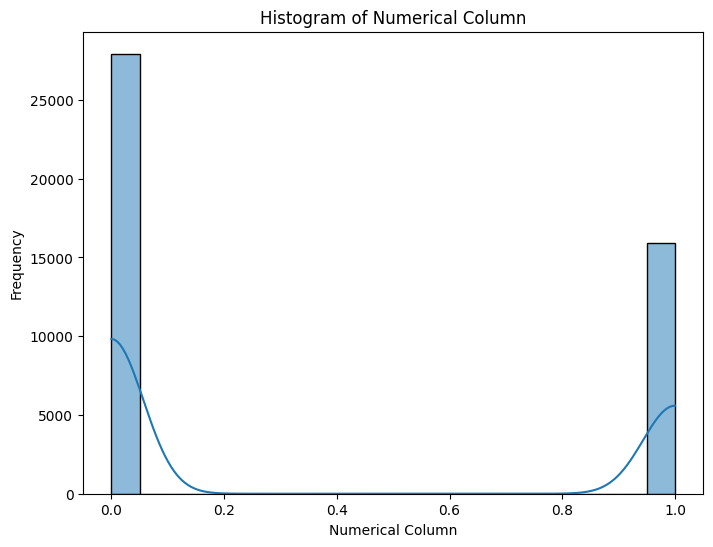


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x0000025671B16200> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data from the CSV file into a DataFrame
df = pd.read_csv('5_yrs_grid_data2.csv')

# Example visualization: Histogram of a numerical column
plt.figure(figsize=(8, 6))
sns.histplot(df['stability'], bins=20, kde=True)
plt.xlabel('Numerical Column')
plt.ylabel('Frequency')
plt.title('Histogram of Numerical Column')
plt.show()

# Example visualization: Scatter plot of two numerical columns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['DateTime'], y=df['c1'], hue=df['stability'])
plt.xlabel('Numerical Column 1')
plt.ylabel('Numerical Column 2')
plt.title('Scatter Plot of Numerical Columns')
plt.legend(title='Category Column')
plt.show()

# Example visualization: Line plot of a numerical column over time
plt.figure(figsize=(8, 6))
sns.lineplot(x=df['DateTime'], y=df['stability'])
plt.xlabel('Date Column')
plt.ylabel('Numerical Column')
plt.title('Line Plot of Numerical Column over Time')
plt.show()
